### <b>Dataset Download</b>

<pre>
<b>Dataset/</b>
    <b>test/</b>
        identity 1/
        identity 2/
        ...
</pre>

In [1]:
%%capture
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EcWlrJ2qjtRJtQVIwR1kW2EBTj8le3PdXI4TYsKErsGMcA?download=1 -O CelebA_HQ_facial_identity_dataset_test.zip
!unzip CelebA_HQ_facial_identity_dataset_test.zip -d ./CelebA_HQ_facial_identity_dataset_test

### <b>Load Dataset</b>

* Set the image directory path and initialize PyTorch data loaders.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt

import time
import os


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

In [3]:
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

data_dir = './CelebA_HQ_facial_identity_dataset_test'

test_dataset = datasets.ImageFolder(os.path.join(data_dir), transforms_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=2)
print('Test dataset size:', len(test_dataset))

class_names = test_dataset.classes
print('Class names:', class_names)

Test dataset size: 1215
Class names: ['102', '1027', '103', '104', '1041', '1043', '1044', '1047', '1052', '1060', '1077', '1079', '108', '1081', '1087', '1090', '1093', '1109', '111', '1112', '112', '1120', '1126', '1133', '1140', '1145', '1149', '1157', '1158', '116', '1191', '121', '1210', '122', '1220', '1237', '124', '125', '1256', '1262', '1268', '1269', '128', '1280', '1285', '129', '1291', '1293', '1307', '1317', '1330', '1335', '1350', '1351', '1370', '1396', '14', '1407', '1427', '1429', '143', '1435', '1440', '1452', '146', '1507', '1515', '1521', '1531', '1538', '1550', '158', '1581', '1584', '1595', '161', '162', '17', '1718', '1730', '175', '177', '1775', '1781', '179', '1796', '180', '1800', '181', '182', '1823', '183', '1837', '1838', '1848', '188', '1904', '1930', '194', '195', '196', '1965', '1972', '1974', '198', '1989', '199', '2020', '203', '2037', '204', '205', '206', '2076', '208', '2116', '2120', '213', '2131', '218', '2193', '2214', '223', '226', '228', '230', 

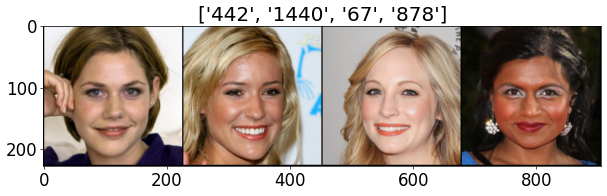

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()


# load a batch of train image
iterator = iter(test_dataloader)

# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

### <b>Load Pre-trained Model</b>

In [5]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EYJeZpups5FEir_wwzkMw30Bq5ZFCA0SbC1UT7ATAwsYsA?download=1 -O facial_identity_classification_transfer_learning_with_ResNet18.pth

--2021-03-13 04:04:43--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EYJeZpups5FEir_wwzkMw30Bq5ZFCA0SbC1UT7ATAwsYsA?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/CelebA%20HQ/facial_identity_classification_transfer_learning_with_ResNet18.pth?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FWUplWnB1cHM1RkVpcl93d3prTXczMEJxNVpGQ0EwU2JDMVVUN0FUQXdzWXNBP3J0aW1lPXREUTdJdFhsMkVn [following]
--2021-03-13 04:04:43--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/CelebA%20HQ/facial_identity_classification_transfer_learning_with_ResNet18.pth?originalPath=aHR0cHM6Ly9wb3N0Z

In [6]:
save_path = 'facial_identity_classification_transfer_learning_with_ResNet18.pth'

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 307) # multi-class classification (num_of_class == 307)
model.load_state_dict(torch.load(save_path))
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
# input data normalization class
class Normalize(nn.Module) :
    def __init__(self, mean, std) :
        super(Normalize, self).__init__()
        self.register_buffer('mean', torch.Tensor(mean))
        self.register_buffer('std', torch.Tensor(std))
        
    def forward(self, input):
        mean = self.mean.reshape(1, 3, 1, 1)
        std = self.std.reshape(1, 3, 1, 1)
        return (input - mean) / std

In [8]:
model = nn.Sequential(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # add an input normalization layer
    model
).to(device).eval()

### <b>Test Phase</b>

[Prediction Result Examples]


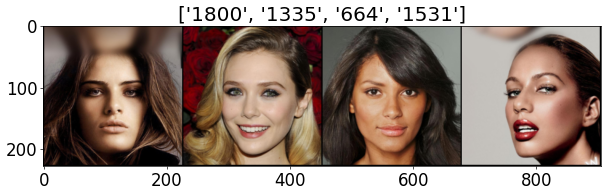

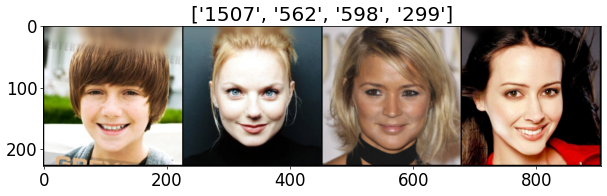

[Test] Loss: 0.5886 Acc: 86.0082% Time: 20.0158s


In [9]:
criterion = nn.CrossEntropyLoss()

model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for i, (inputs, labels) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        if i == 0:
            print('[Prediction Result Examples]')
            images = torchvision.utils.make_grid(inputs[:4])
            imshow(images.cpu(), title=[class_names[x] for x in labels[:4]])
            images = torchvision.utils.make_grid(inputs[4:8])
            imshow(images.cpu(), title=[class_names[x] for x in labels[4:8]])

    epoch_loss = running_loss / len(test_dataset)
    epoch_acc = running_corrects / len(test_dataset) * 100.
    print('[Test] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>Prepare Adversarial Attack Libraries</b>

In [12]:
!pip install foolbox
!pip install advertorch

In [13]:
def get_distance(a, b):
    l0 = torch.norm((a - b).view(a.shape[0], -1), p=0, dim=1)
    l2 = torch.norm((a - b).view(a.shape[0], -1), p=2, dim=1)
    mse = (a - b).view(a.shape[0], -1).pow(2).mean(1)
    linf = torch.norm((a - b).view(a.shape[0], -1), p=float('inf'), dim=1)
    return l0, l2, mse, linf

#### <b>Adversarial Attack Example 1</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 100 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


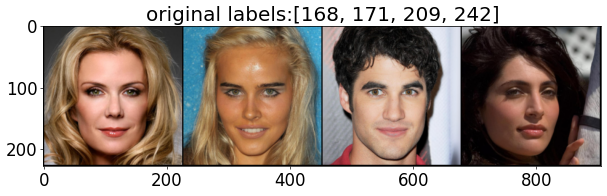

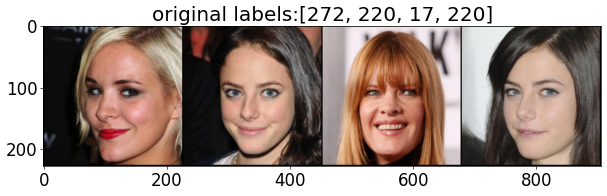

[Start Image Examples]


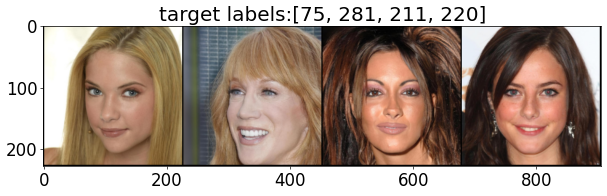

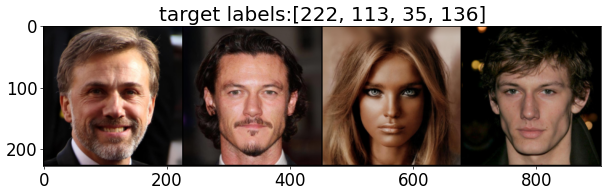

[Attack Result Examples]


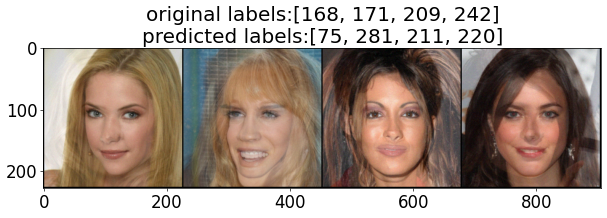

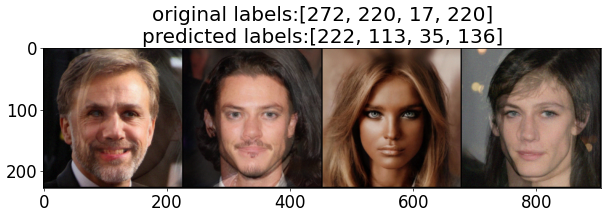

[Step #0] Loss: 0.5838 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 4.6303s (total 16 images)
[Step #10] Loss: 0.4749 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 30.7276s (total 176 images)
[Step #20] Loss: 0.4538 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 56.6730s (total 336 images)
[Step #30] Loss: 0.4534 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 82.1527s (total 496 images)
[Step #40] Loss: 0.4611 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 107.9832s (total 656 images)
[Step #50] Loss: 0.4551 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 133.8791s (total 816 images)
[Step #60] Loss: 0.4536 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 159.3642s (total 976 images)
[Step #70] Loss: 0.4565 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 185.0415s (total 1136 images)
[Validation] Loss: 0.4539 Accuracy: 0.0000% Attack success rate: 100.0000% Tim

In [17]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=100,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)

#### <b>Adversarial Attack Example 2</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 500 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


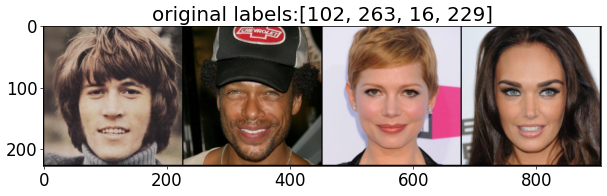

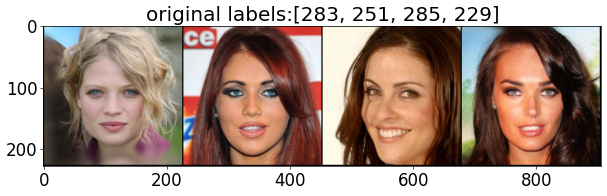

[Start Image Examples]


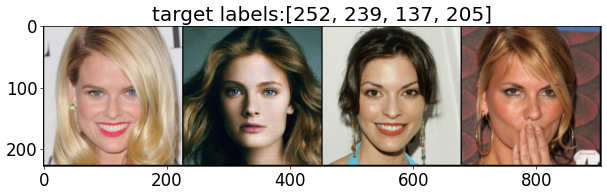

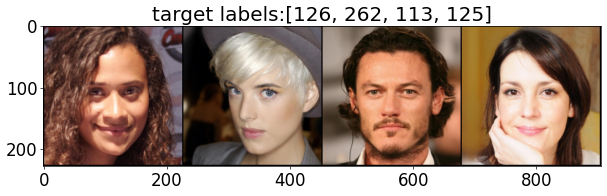

[Attack Result Examples]


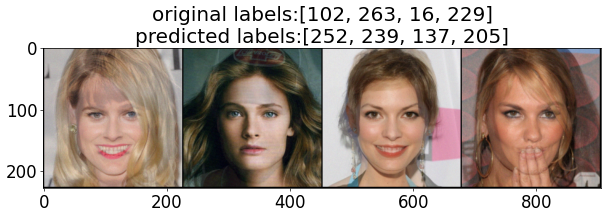

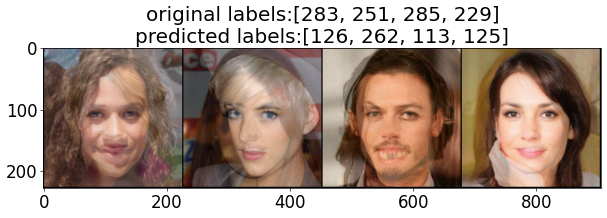

[Step #0] Loss: 0.4424 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 12.5319s (total 16 images)
[Step #10] Loss: 0.4360 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 115.9351s (total 176 images)
[Step #20] Loss: 0.4436 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 218.9195s (total 336 images)
[Step #30] Loss: 0.4434 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 322.1804s (total 496 images)
[Step #40] Loss: 0.4326 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 425.3648s (total 656 images)
[Step #50] Loss: 0.4342 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 528.6387s (total 816 images)
[Step #60] Loss: 0.4298 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 631.9667s (total 976 images)
[Step #70] Loss: 0.4235 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 735.2805s (total 1136 images)
[Validation] Loss: 0.4254 Accuracy: 0.0000% Attack success rate: 100.0000%

In [18]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=500,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)

#### <b>Adversarial Attack Example 3</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 1000 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


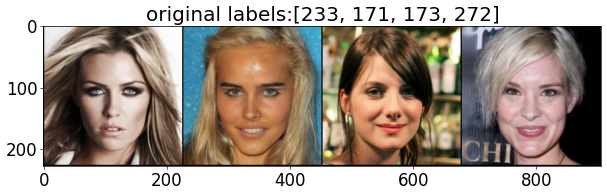

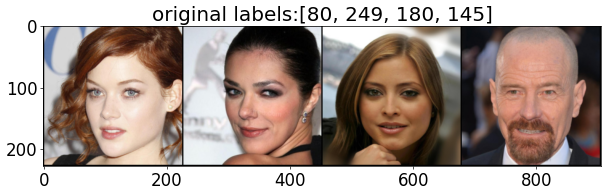

[Start Image Examples]


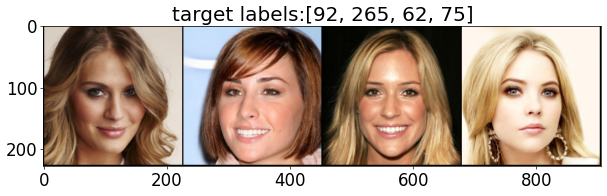

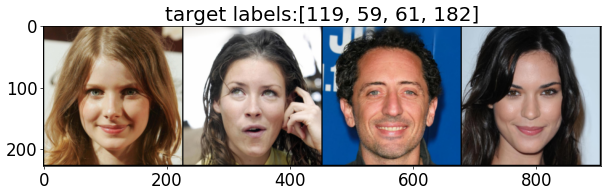

[Attack Result Examples]


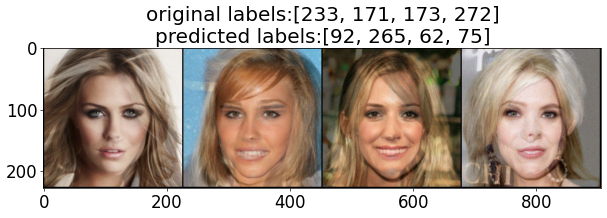

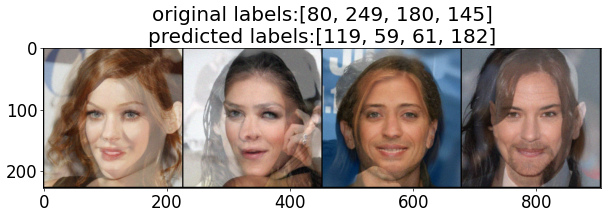

[Step #0] Loss: 0.2643 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 22.2961s (total 16 images)
[Step #10] Loss: 0.3507 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 223.4924s (total 176 images)
[Step #20] Loss: 0.3384 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 423.5697s (total 336 images)
[Step #30] Loss: 0.3475 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 623.9842s (total 496 images)
[Step #40] Loss: 0.3575 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 824.2002s (total 656 images)
[Step #50] Loss: 0.3569 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1024.7046s (total 816 images)
[Step #60] Loss: 0.3587 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1225.1047s (total 976 images)
[Step #70] Loss: 0.3534 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1425.1867s (total 1136 images)
[Validation] Loss: 0.3524 Accuracy: 0.0000% Attack success rate: 100.00

In [19]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=1000,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)

#### <b>Adversarial Attack Example 4</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 3000 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


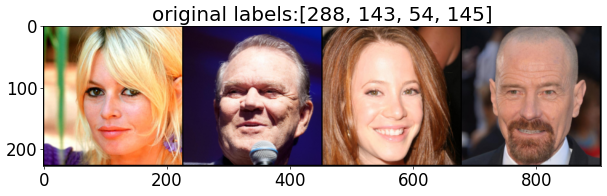

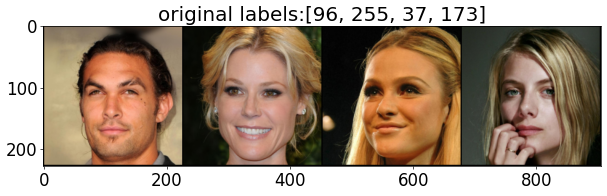

[Start Image Examples]


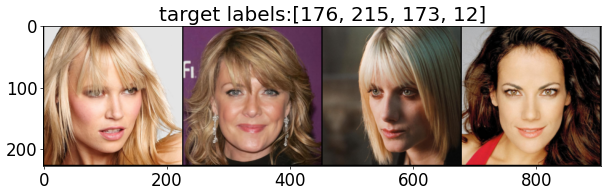

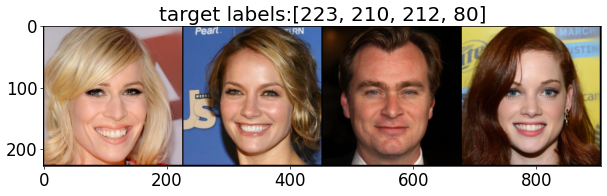

[Attack Result Examples]


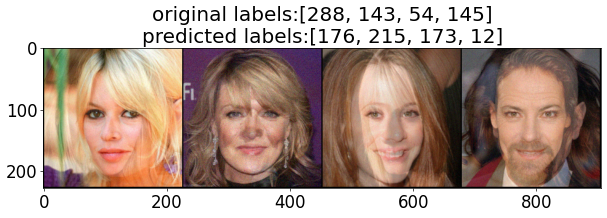

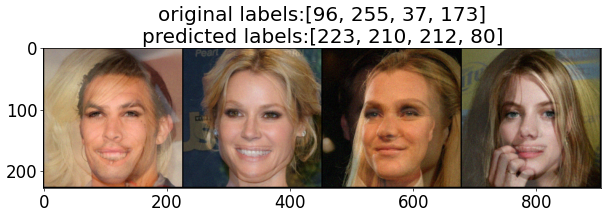

[Step #0] Loss: 0.1924 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 61.1171s (total 16 images)
[Step #10] Loss: 0.2262 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 650.9155s (total 176 images)
[Step #20] Loss: 0.2477 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1240.4186s (total 336 images)
[Step #30] Loss: 0.2482 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1829.3250s (total 496 images)
[Step #40] Loss: 0.2425 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 2417.8004s (total 656 images)
[Step #50] Loss: 0.2332 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 3007.6325s (total 816 images)
[Step #60] Loss: 0.2327 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 3596.9672s (total 976 images)
[Step #70] Loss: 0.2359 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 4186.6099s (total 1136 images)
[Validation] Loss: 0.2359 Accuracy: 0.0000% Attack success rate: 100

In [20]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=3000,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)

#### <b>Adversarial Attack Example 5</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 5000 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


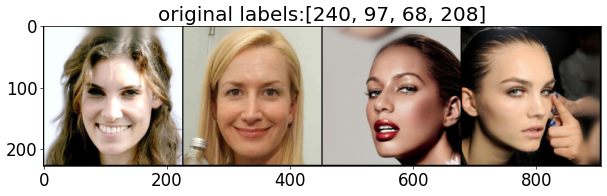

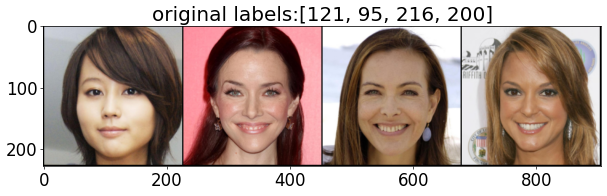

[Start Image Examples]


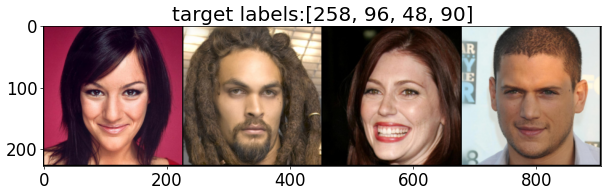

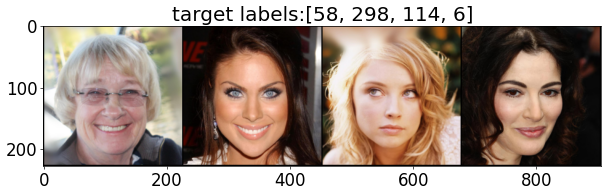

[Attack Result Examples]


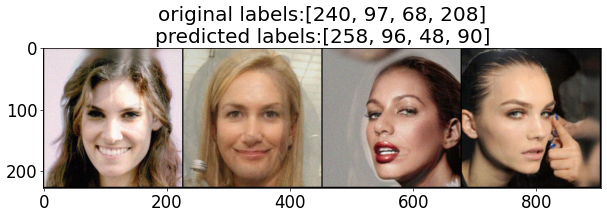

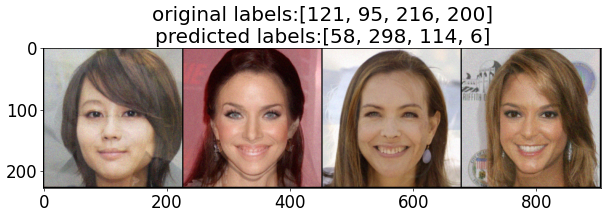

[Step #0] Loss: 0.1526 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 100.0322s (total 16 images)
[Step #10] Loss: 0.1829 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 1077.2610s (total 176 images)
[Step #20] Loss: 0.1890 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 2055.8380s (total 336 images)
[Step #30] Loss: 0.1939 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 3033.7097s (total 496 images)
[Step #40] Loss: 0.1959 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 4012.2451s (total 656 images)
[Step #50] Loss: 0.1953 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 4991.6441s (total 816 images)
[Step #60] Loss: 0.1963 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 5969.3905s (total 976 images)
[Step #70] Loss: 0.1976 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 6947.3528s (total 1136 images)
[Validation] Loss: 0.1968 Accuracy: 0.0000% Attack success rate: 1

In [21]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=5000,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)

#### <b>Adversarial Attack Example 6</b>

* <b>Attack method</b>: Boundary Attack
* <b>Options</b>: 10000 iterations + start from the target (targeted attack)
* <b>Images</b>: All test images

The dimension of an image tensor: torch.Size([3, 224, 224])
[Original Image Examples]


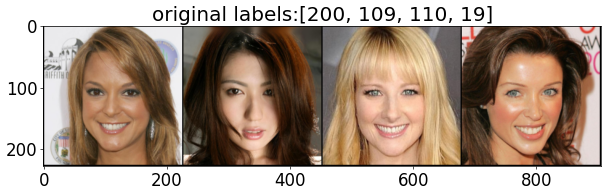

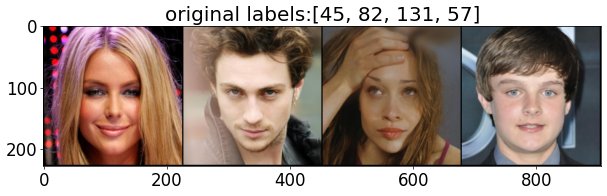

[Start Image Examples]


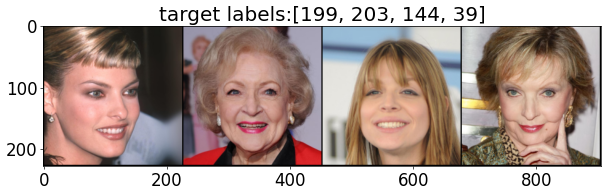

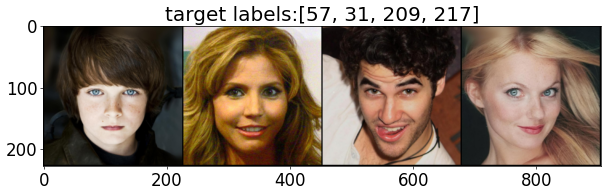

[Attack Result Examples]


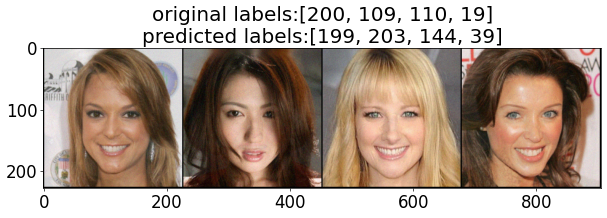

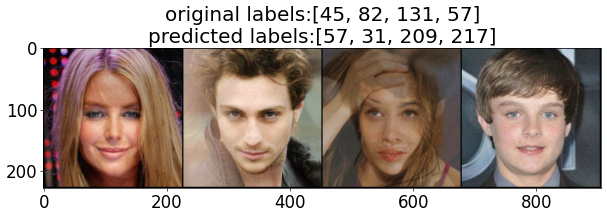

[Step #0] Loss: 0.1816 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 197.7538s (total 16 images)
[Step #10] Loss: 0.1528 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 2146.3523s (total 176 images)
[Step #20] Loss: 0.1640 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 4095.8496s (total 336 images)
[Step #30] Loss: 0.1589 Accuracy: 0.0000% Attack success rate: 100.0000% Time elapsed: 6044.9578s (total 496 images)


In [ ]:
import time
import random
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.BoundaryAttack(init_attack=None, steps=10000,
                                   spherical_step=0.01, source_step=0.01, source_step_convergance=1e-07,
                                   step_adaptation=1.5, tensorboard=False, update_stats_every_k=10)

running_loss = 0.
running_corrects = 0
running_success = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # generate "random target instances" that are correctly classified.
    starting_points = torch.zeros(labels.shape[0], 3, 224, 224).to(device)
    target_labels = torch.zeros(labels.shape[0]).long().to(device)
    for k in range(labels.shape[0]):
        starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
    outputs = model(starting_points)
    _, preds = torch.max(outputs, 1)
    while True:
        condition = 0
        idx = torch.tensor([], dtype=torch.long)
        if target_labels.ne(preds).sum() > 0: # to be correctly classified
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.ne(preds)]], dim=0)
            condition += 1
        if target_labels.eq(labels).sum() > 0: # to be different from the original labels
            idx = torch.cat([idx, torch.arange(0, labels.shape[0]).long()[target_labels.eq(labels)]], dim=0)
            condition += 1
        idx = torch.unique(idx)
        if condition == 0:
            break
        for k in list(idx):
            starting_points[k], target_labels[k] = test_dataset[random.randint(0, len(test_dataset) - 1)]
        outputs = model(starting_points[idx])
        _, preds[idx] = torch.max(outputs, 1)

    attack_criterion = fb.criteria.TargetedMisclassification(target_labels)
    _, adv_targeted, _ = attack(fmodel, inputs, criterion=attack_criterion, starting_points=starting_points, epsilons=None) # adversarial attack

    outputs = model(adv_targeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_success += torch.sum(preds == target_labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_targeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Original Image Examples]')
        images = torchvision.utils.make_grid(inputs[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]))
        images = torchvision.utils.make_grid(inputs[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]))
        print('[Start Image Examples]')
        images = torchvision.utils.make_grid(starting_points[:4])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[:4]]))
        images = torchvision.utils.make_grid(starting_points[4:8])
        imshow(images.cpu(), title='target labels:' + str([int(x) for x in target_labels[4:8]]))
        print('[Attack Result Examples]')
        images = torchvision.utils.make_grid(adv_targeted[:4])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
               '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        images = torchvision.utils.make_grid(adv_targeted[4:8])
        imshow(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
               '\npredicted labels:' + str([int(x) for x in preds[4:8]]))

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        running_asr = running_success / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, running_asr, time.time() - start_time, running_length))

epoch_loss = running_loss / running_length
epoch_acc = running_corrects / running_length * 100.
epoch_asr = running_success / running_length * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Attack success rate: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, epoch_asr, time.time() - start_time, running_length))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / running_length)
print('Average L2 distance:', running_l2 / running_length)
print('Average MSE:', running_mse / running_length)
print('Average Linf distance (the maximum changed values):', running_linf / running_length)